# Szimplektikus integrátor


**Tekintsünk egy matematikai ingát, azaz egy súlytalan rúdra függesztett testet, mely homogén gravitációs térben leng: ![Inga](./pendulum2.png).**

* A példánkban az egyszerűség kedvéért a test tömege és a gravitációs gyorsulás egyaránt legyen egységnyi. 

* Ha $q$ jelöli az inga függőlegessel bezárt szögét, $p$ pedig a lendületét, akkor az inga mozgását a
\begin{align}
\dot{q} &= p\\
\dot{p} &= -\sin (q)
\end{align}
differenciálegyenlet rendszer írja le. 

* Ez a fizikai rendszer nem disszipatív, azaz mozgás során az összes energia állandó, a mozgás a $H(q,p)= \frac{1}{2}p^2-\cos (q)$ Hamilton függvény szintvonalain történik. 

* A numerikus megoldások -- a választott módszertől függően -- nem feltétlenül rendelkeznek ezzel a tulajdonsággal és hosszú időn keresztül futtatva fizikailag teljesen hibás megoldást adhatnak. Pontosan ezért a kaotikus Hamilton rendszerek hosszú idejű szimulációjánál az ún. *geometriai integrátorokat* részesítik előnyben. 

* Geometriai integrátor alatt olyan iteratív numerikus sémát értünk, mely a differenciálegyenlet fázisáramlásának valamely geometriai tulajdonságát megőrzi. A geometriai integrátorok fontos osztályát képezik a Hamilton rendszerekre kifejlesztett ún. *szimplektikus integrátorok*, melyek jellemzője, hogy az iteráció maga is ún. szimplektomorfizmus vagy más néven kanonikus transzformáció, ami a fázistérfogatot megőrzi (lásd: Liouville tétele).


Vezessük be a $z = [q,p]^\top$ és $f(z)=[p, -\sin (q)]^\top$ tömörebb jelöléseket, mellyel az inga mozgásegyenlete a
$$
\dot{z} = f(z)
$$
alakba megy át és vizsgáljuk meg, hogy néhány, a numerikus módszerek tárgy keretében tanult egyszerűbb közönséges differenciálegyenlet megoldó algoritmus hogyan viselkedik. 

* Ehhez előre implementáltunk egy szimulációs függvényt, amely inputként a megoldó solvert kapja (Python függvény), futtatja a szimulációt és az eredményt megjeleníti.

In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, clear_output

def pendulum_simulation(solver):
    """
    Inga szimuláció
    """
    
    h = 0.1  # lépésköz
    
    # A differenciálegyenlet jobb oldala
    f = lambda z: np.array([z[1],-np.sin(z[0])])
    
    # Kezdeti feltételek (nyugalmi állapotából picit meglökjük)
    z0 = np.array([0.0, 1.0])
    
    # A Hamilton függvény
    H = lambda z: 0.5*z[1]**2.0-np.cos(z[0])
    
    dynamics = solver(f,h,z0)  # az iterátor, mely a következő időpontbeli értéket adja
    
    fig = plt.figure(figsize=plt.figaspect(1.0))    
    ax1 = fig.add_subplot(111,autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-1.5, 0.5))  # inga megjelenítéséhez
    ax1.grid()
    
    line1, = ax1.plot([], [], 'o-', lw=2)
    
    def animate(i):
        
        z = next(dynamics)
        x = [0.0, np.sin(z[0])]
        y = [0.0, -np.cos(z[0])]
        
        line1.set_data(x, y)
        print("Total energy: " + str(H(z)))
        
        
    for i in range(200):
        animate(i)
        clear_output(wait=True)
        display(fig)

    plt.show()

# Szimplektikus Euler-módszer

A szimplektikus Euler módszer a közönséges Euler sémához hasonlóan elsőrendű integrátor, ami azt jelenti, hogy az egylépéses hiba $O(h)$ nagyságrendű, ahol $h$ a lépésköz. Az implicit és explicit Euler sémákhoz képest viszont lényeges eltérés, hogy a szimulált mechanikai rendszer energiáját jó közelítéssel megőrzi.

A szimplektikus Euler módszer iterációs lépése:
$$
z_{k+1} = z_k + h f(q_k,p_{k+1})
$$

Látható, hogy a séma a hely koordinátában explicit, az impulzus koordinátában pedig implicit, ezért szemi-implicit Euler módszernek is nevezik.

Alább látható a szimplektikus Euler séma implementációja, melyet generátorok segítségével valósítottunk meg. Ennek mintájára kell majd leprogramozni az explicit és implicit Euler módszert, illetve a középponti módszert.

In [2]:
import autograd.numpy as np
from scipy.optimize import fsolve
from autograd import jacobian

def symplectic_Euler(f, h, z0):
    """
    szimplektikus Euler-séma megoldó
    """
    
    z = z0
    
    while True:
        
        yield z
        
        # ez egy implicit séma, ezért egyenletet kell megoldani ahhoz, hogy z új értékét megkapjuk
        F = lambda w: w-z-h*f(np.array([z[0], w[1]]))
        dF = jacobian(F)
        z = fsolve(F, z, fprime=dF)


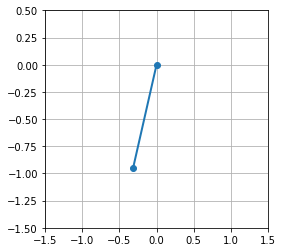

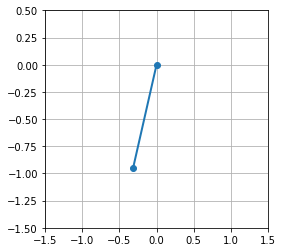

In [3]:
# szimuláció    
pendulum_simulation(symplectic_Euler)

# Házi Feladatok

## Explicit Euler-módszer

Készítsük el az explicit Euler módszer implementációját a szimplektikus Euler módszer mintájára, futtassuk az inga szimulációt és értelmezzük a kapott eredményeket. A mechanikai energia hogyan változik az iteráció során?

Iterációs lépés:
$$
z_{k+1} = z_k + h f(z_k)
$$

In [5]:
import autograd.numpy as np

def explicit_Euler(f, h, z0):
    """
    Explicit Euler-séma megoldó
    """
    
    z = z0
    
    while True:
        
        yield z
        
        z = z + h*f(z)

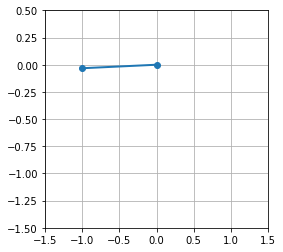

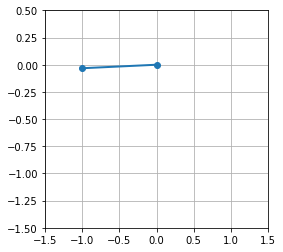

In [6]:
# szimuláció    
pendulum_simulation(explicit_Euler)  

## Implicit Euler-módszer

Készítsük el az implicit Euler módszer implementációját a szimplektikus Euler módszer mintájára, futtassuk az inga szimulációt és értelmezzük a kapott eredményeket. A mechanikai energia hogyan változik az iteráció során?

Iterációs lépés:
$$
z_{k+1} = z_k + h f(z_{k+1})
$$

In [63]:
import autograd.numpy as np

def implicit_Euler(f, h, z0):
    """
    Implicit Euler-séma megoldó
    """
    
    z = z0
    
    while True:
        
        yield z
        
        # ez egy implicit séma, ezért egyenletet kell megoldani ahhoz, hogy z új értékét megkapjuk
        F = lambda w: w-z-h*f(w)
        dF = jacobian(F)
        z = fsolve(F, z, fprime=dF)
    

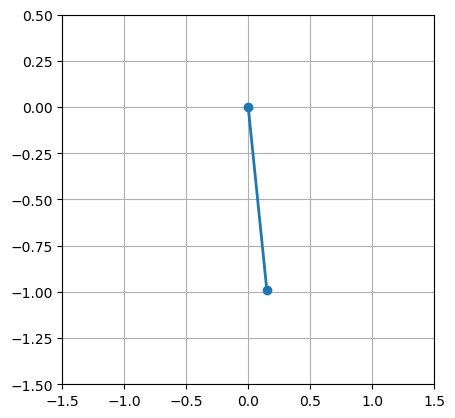

In [64]:
# szimuláció    
pendulum_simulation(implicit_Euler)

## Középponti módszer

Készítsük el a középponti módszer implementációját a szimplektikus Euler módszer mintájára, futtassuk az inga szimulációt és értelmezzük a kapott eredményeket. A mechanikai energia hogyan változik az iteráció során?

Iterációs lépés:
$$
z_{k+1} = z_k + h f\left(\frac{z_k+z_{k+1}}{2}\right)
$$

In [65]:
import autograd.numpy as np

def midpoint_method(f, h, z0):
    """
    Középponti módszer megoldó
    """
    
    z = z0
    
    while True:
        
        yield z
        
        # ez egy implicit séma, ezért egyenletet kell megoldani ahhoz, hogy z új értékét megkapjuk
        F = lambda w: w-z-h*f(0.5*(w+z))
        dF = jacobian(F)
        z = fsolve(F, z, fprime=dF)


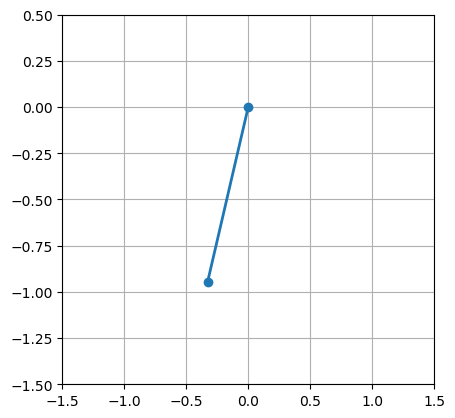

In [66]:
# szimuláció    
pendulum_simulation(midpoint_method)

# További olvasnivalók

1. https://en.wikipedia.org/wiki/Geometric_integrator (a példát innen vettem)

2. https://en.wikipedia.org/wiki/Symplectic_integrator (hogyan konstruáljunk szimplektikus integrátorokat)

3. http://www.mat.unimi.it/users/sansotte/pdf_files/hamsys/HaiLubWan-2006.pdf (egy jó tankönyv annak, aki szeretne "szakértővé" válni)

4. https://en.wikipedia.org/wiki/Energy_drift (Energia drift: egy numerikus szimulációkat terhelő hibafajta)

5. https://en.wikipedia.org/wiki/Flying_ice_cube (Repülő jégkocka :))

6. https://python-course.eu/advanced-python/generators-iterators.php (generátorok és iterátorok Python-ban)